In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Quantitative and Forecasting Analysis of Global University Ranking via Economic and Educational Indicators 

Forecasting Country-Level University Rankings Using Economic Indicators: A Comparative Modeling Approach (2017–2023)

### Author Ivan Georgiev Georgiev 

## Abstract 

This project investigates the relationship between university rankings and economic indicators, specifically GDP, across countries from 2017 to 2022. By identifying the top-performing countries and analyzing their historical data, we apply various forecasting models to predict 2023 university scores. 
To accomplish this, we apply and compare a set of forecasting methods, including:

- Linear Trend Extrapolation as a baseline; 
- exponential smoothing
- ARIMA

We then incorporate GDP data to explore economic influence, culminating in an ARIMAX model using GDP as an exogenous variable. Results are compared with actual 2023 data to evaluate prediction accuracy and economic influence.

Each model offers a different perspective—some prioritize time dynamics, while others emphasize economic context and uncertainty. Forecasts are validated using actual 2024 QS rankings where available. The results highlight both the predictive power of national-level indicators and the strengths and weaknesses of each forecasting technique.

This work provides a data-driven framework for understanding the evolution of educational performance across countries and suggests how policymakers and academic stakeholders might respond to long-term trends in global rankings. 

This study examines the interplay between economic development and the performance of elite higher education institutions. Utilizing QS World University Rankings data (2017–2024) for the top 300 universities in each year, coupled with GDP per capita statistics, we investigate the extent to which macroeconomic conditions shape institutional rankings. Restricting the analysis to the top 300 institutions ensures data completeness and reliability, mitigating biases from missing values prevalent in lower ranks. Employing a combination of statistical and time series forecasting approaches—including Linear Trend Extrapolation, Multiple Linear Regression, and ARIMA/ARIMAX—we project future ranking scores and evaluate the predictive power of economic indicators. The findings contribute to the understanding of how national economic performance influences the global standing of leading universities and offer implications for higher education policy and investment strategies.



## Introduction 

University rankings such as the QS World University Rankings are widely regarded as benchmarks for educational quality and global academic competitiveness. Countries that consistently host top-performing institutions are often seen as knowledge hubs, attracting international students, faculty, and investment.

Understanding what drives a country's university ranking performance is essential not only for educational policy but also for long-term socio-economic planning. Among the possible factors influencing rankings, economic indicators such as GDP (Gross Domestic Product) play a pivotal role, reflecting the country’s investment capability in education, research, and infrastructure.

This project aims to investigate whether we can predict a country's university performance (in terms of average QS score and number of universities) using historical trends and economic indicators like GDP. We also want to evaluate how different forecasting and statistical models perform in predicting such outcomes and whether economic data improves prediction accuracy.

Each model captures different assumptions: trend continuity (linear), economic impact (Monte Carlo), recent stability (MA), or momentum (smoothing). These approaches are compared quantitatively and visually in later sections. 

**Objective**
This project investigates whether global university rankings at the country level can be forecasted using key economic and educational indicators. Specifically, it aims to predict the average QS World University Rank per country for the year 2024 based on historical data (2017–2022) and variables such as GDP per capita, literacy rate, and R&D expenditure.

Motivation University rankings play a critical role in shaping international education policy, research funding, and student decision-making. While many analyses focus on institutional performance, this project shifts the lens to the country level, offering insights into how macroeconomic and social conditions influence national academic outcomes.

Research Questions

To what extent do indicators like GDP per capita, literacy rate, and R&D investment correlate with average university rank?

Can time series and regression-based models accurately forecast future rankings using this data?

Which forecasting methods provide the most reliable and interpretable predictions?

Significance The ability to anticipate changes in a country's academic standing can inform education policy, international collaboration, and investment decisions. It also helps identify which countries are likely to improve or decline in global academic competitiveness — and why.

## Previous Work Preview

## Correlation and Forecasting Models Overview/General Principles 

This section outlines the statistical methods used to quantify the relationship between the $textit${QS World University Rankings} and selected economic and educational indicators, including GDP per capita, government effectiveness, research and development (R\&D) expenditure, literacy rates, and primary/tertiary school attendance.

- Pearson Correlation Coefficient

The Pearson correlation coefficient, denoted as $r$, measures the strength and direction of a $\mathbf{linear}$ relationship between two continuous variables. Its value lies within the interval $[-1, 1]$, where $r = +1$ indicates perfect positive correlation, $r = -1$ indicates perfect negative correlation, and $r = 0$ indicates no linear correlation.


\begin{equation}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{equation}
where $x_i, y_i$ are paired observations, and $\bar{x}, \bar{y}$ denote their respective means.

In the context of this study, Pearson's $r$ identifies whether indicators such as GDP per capita or literacy rate exhibit a direct proportionality with the QS \textit{total\_score}.

- Spearman’s Rank Correlation Coefficient
Spearman’s $\rho$ is a non-parametric measure that assesses the strength and direction of a $\mathbf{linear}${monotonic} relationship between two variables, without assuming linearity. It operates on the ranked values of the data.

\begin{equation}
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
\end{equation}
where $d_i = R(x_i) - R(y_i)$ is the difference between the ranks of $x_i$ and $y_i$, and $n$ is the number of observations.

In this project, Spearman’s $\rho$ is useful when increases in an economic or educational indicator correspond to increases in QS rankings, but not necessarily in a proportional manner.

- Kendall’s Tau Coefficient
Kendall’s $\tau$ is another rank-based correlation measure that evaluates the correspondence between the orderings of two datasets by counting concordant and discordant pairs.

Let $C$ be the number of concordant pairs and $D$ the number of discordant pairs:

\begin{equation}
\tau = \frac{C - D}{\frac{1}{2}n(n-1)}
\end{equation}

A pair $(x_i, y_i)$ and $(x_j, y_j)$ is \textit{concordant} if $(x_i - x_j)(y_i - y_j) > 0$, and \textit{discordant} if $(x_i - x_j)(y_i - y_j) < 0$.

Kendall’s $\tau$ is particularly appropriate for assessing the similarity of country rankings across QS scores and other indicators.

- Top-20 Comparative Overlap
To evaluate the similarity between the top-performing countries by QS $\mathbf{linear}${total\_score} and those ranked highly in a given indicator, the \textbf{overlap percentage} is calculated:

\begin{equation}
\text{Overlap\%} = \frac{|T_Q \cap T_I|}{20} \times 100
\end{equation}
where $T_Q$ is the set of top 20 countries by QS score, and $T_I$ is the set of top 20 countries by a given indicator.

This metric provides a direct measure of elite-set similarity between the QS rankings and indicator-based rankings.

- Data Standardization
Since economic and educational indicators are measured on different scales, variables are standardized before correlation analysis:

\begin{equation}
Z_{i} = \frac{x_i - \mu}{\sigma}
\end{equation}
where $\mu$ is the mean and $\sigma$ is the standard deviation of the variable.

Standardization ensures comparability and prevents scale differences from biasing the correlation analysis.

Summary


These methods together offer a comprehensive view of the relationships between national-level economic and educational performance and global university rankings.

### Linear Trend Extrapolation
To model simple growth or decline over time and provide a baseline forecast.

Concept:
Assumes a linear relationship between time $t$ and the response variable $y_t$ (e.g., score). 
$$\hat{y}_t = \beta_0 + \beta_1 t$$
Where $\beta_0$ is the intercept, and $\beta_1$ is the slope (change in score per year).

### Moving Average Forecasting
To smooth out short-term fluctuations and highlight longer-term trends or cycles.

Concept:
Uses the average of past $k$ observations to predict the next value.

Simple Moving Average of window size $k$ 

$$\hat{y}_t = \frac{1}{k} \sum_{i = t - k}^{t - 1} y_i$$

### Exponential Smoothing (Single & Holt-Winters)
To give more weight to recent data points, which often better reflect future trends. Holt-Winters also captures trend and seasonality.

Concept:
A weighted average where weights decline exponentially for older observations.

**Single Exponential Smoothing**:
$$\hat{y}_t = \alpha y_{t-1} + (1 - \alpha) \hat{y}_{t-1}$$

Where $\alpha \in [0, 1]$ is the smoothing parameter.

**Holt’s Linear Trend Method (Two Parameters)**:
$$\begin{align*}
\ell_t &= \alpha y_t + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
b_t &= \beta (\ell_t - \ell_{t-1}) + (1 - \beta) b_{t-1} \\
\hat{y}_{t+h} &= \ell_t + h b_t
\end{align*}$$

**Holt-Winters (Additive Seasonal):**
$$\hat{y}_{t+h} = \ell_t + h b_t + s_{t - m + (h \bmod m)}$$

### ARIMA (Autoregressive Integrated Moving Average)
A powerful time-series model that combines autoregression, differencing (to remove trends), and moving averages.

**Concept**
ARIMA(p,d,q) models the data as:

AR (p): regression on past values

I (d): differencing to remove trend

MA (q): regression on past forecast errors

**General ARIMA Equation**
$$
\phi(B)(1 - B)^d y_t = \theta(B) \varepsilon_t
$$

Where:

-$\quad \phi(B)$: autoregressive (AR) polynomial  
-$\quad \theta(B)$: moving average (MA) polynomial  
-$\quad B$: backshift operator, $B y_t = y_{t-1}$  
-$\quad \varepsilon_t$: white noise (error term)


### Correlation & Regression with GDP
To explore whether economic performance influences university rankings.

**Methods**
Pearson correlation for linear relationships

Spearman correlation for monotonic (not necessarily linear)

Simple linear regression to model effect of GDP on score

Simple Linear Regression Equation:
$$
\hat{y}_t = \beta_0 + \beta_1 \cdot \text{GDP}_t + \varepsilon_t
$$

### ARIMAX (ARIMA with Exogenous Variables)
o include external influences (GDP) in the ARIMA model.

**Concept**
Adds exogenous (independent) variables to ARIMA, enabling better prediction if those variables explain the variance.

ARIMAX Equation

$$
y_t = \beta_0 + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \sum_{k=1}^{m} \gamma_k x_{k,t} + \varepsilon_t
$$

Where:

$\quad x_{k,t}$: exogenous variables (e.g., GDP)  
$\quad \gamma_k$: coefficients for exogenous variables

## Experiment Setup and Methodology
### Datasets
**University Rankings (QS)**
Source: QS World University Rankings datasets (2017–2024)

Features used: Institution Name, Country, Year, Overall Score.

Derived features: Average score per country per year, Number of ranked universities per country per year

**GDP Data**
Source: [World Bank] 

Features used: Country, Year, GDP (constant USD), GDP per capita (optional) 

https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.PCAP.CD&country=#

**Preprocessing**

- Standardized country names to match QS data.

- Filled missing values using linear interpolation or forward fill.

- Converted to time series format indexed by country and year.
### Instance Generation
We limit our focus to the top 10 countries by average QS score and number of universities. Instances are generated using a rolling window where applicable (e.g., for moving average, ARIMA).

In this analysis, total score is used as the primary metric for comparing countries in the QS World University Rankings. This measure, calculated as the sum of all ranked universities’ scores within a country, captures both the scale of the higher education system and the quality of its institutions. It offers a more balanced view than either the number of universities alone, which ignores academic performance, or the average score, which can be skewed by countries with very few ranked universities.

Average score per institution is also examined as a supplementary indicator to highlight cases where countries achieve exceptional quality despite having a small number of ranked universities. For example, Singapore’s consistently high average score reflects a concentrated presence of world-class institutions, demonstrating that per-institution excellence does not always align with total system dominance.

### Performance Metrics
To assess model performance, we use the following metrics on the 2023 forecast results:

| Metric                           | Formula                                | Interprets                            |   |                       |
| -------------------------------- | -------------------------------------- | ------------------------------------- | - | --------------------- |
| **MAE (Mean Absolute Error)**    | ( \frac{1}{n} \sum                     | y\_t - \hat{y}\_t                     | ) | Avg. absolute error   |
| **MSE (Mean Squared Error)**     | $\frac{1}{n} \sum (y_t - \hat{y}_t)^2$ | Penalizes large errors                |   |                       |
| **RMSE**                         | $\sqrt{MSE}$                           | More interpretable than MSE           |   |                       |
| **MAPE (Mean Absolute % Error)** | ( \frac{100%}{n} \sum \left            | \frac{y\_t - \hat{y}\_t}{y\_t} \right | ) | Relative error metric |


Each model’s prediction will be evaluated per country, and results will be summarized with visualizations and error tables.

### Methodologies Applied

We test and compare the following approaches:

**Baseline Models**
- Linear Trend Extrapolation
- Moving Average (Windowed)
- Exponential Smoothing (Simple + Holt-Winters)

**Time-Series Models**
- ARIMA(p,d,q) — Auto-selected by AIC/BIC grid search
- ARIMAX(p,d,q) with GDP — GDP used as exogenous regressor

**Correlation & Regression Models**
- Pearson / Spearman correlation between:
    -GDP and average university score
    -GDP and number of universities
- Linear regression:
$$
\text{score}_t = \beta_0 + \beta_1 \cdot \text{GDP}_{t-1} + \varepsilon_t
$$

### Validation and Assumptions
**Time Series Assumptions**
- Stationarity tested using ADF test
- Residual diagnostics applied to ARIMA models

**GDP as Exogenous**
- Assumes GDP from year $t−1$ influences rankings in year $t$

**Missing Data**
- Rows with missing scores were removed
- GDP gaps filled with forward fill or interpolation

### Experimental Design
Training Period: 2017–2022

Forecast Target: 2023

Test Comparison: Compare predictions to real 2023 QS scores

Top Countries Tracked:

Based on average score and number of institutions over 2017–2022

### Model Configuration and Hyperparameter Selection

| Model          | Parameters / Notes                                   |
| -------------- | ---------------------------------------------------- |
| Linear Trend   | Fitted by OLS regression                             |
| MA             | Window size = 3 years (2019–2021 for 2022)           |
| Exp. Smoothing | Alpha optimized using `statsmodels`                  |
| Holt-Winters   | Seasonal period = 1 (no strong seasonality expected) |
| ARIMA          | Grid search over p, d, q with AIC/BIC selection      |
| ARIMAX         | Same as ARIMA, with lagged GDP as external input     |



## QS University Dataset- Exploratory Data Analysis (EDA)

**Objective**
The EDA section examines how country-level indicators relate to average QS university rankings and identifies patterns, trends, and correlations in the data from 2017–2022.

### Data Overview
For University Ranking dataset we will display basic information and summaries. We will show the number of countries, years covered and display sample rows. As part of the data overview we will check data types, missing values, and duplicate entries.
### Data Cleaning
In respect to missing values, we observe that in the dataset we have 3642 missing values. Since, we are focuisng on the top 300 universities, we check for the data there. We drop the 7 missing scores (e.g., mean/linear interpolation). We standardize country names. We check for outliers using boxplots and see if we can identify countries with extremely low or high scores

In [18]:
# Load dataset
df_rank = pd.read_csv("data/world-university-rankings-2017-to-2022.csv")

In [19]:
# Display basic information
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [20]:
df_rank.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6482.0,2019.693613,1.716683,2017.0,2018.0,2020.0,2021.000,2022.0
score,2820.0,46.595532,18.813110,23.5,31.8,40.6,58.025,100.0
student_faculty_ratio,6407.0,13.264554,6.604294,1.0,9.0,12.0,17.000,67.0


In [21]:
df_rank.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [22]:
num_countries_rank = df_rank['country'].nunique()
num_years_rank = df_rank['year'].nunique()
print(f"Ranking Dataset: {num_countries_rank} countries, {num_years_rank} years")

Ranking Dataset: 97 countries, 6 years


In [23]:
print("Missing Values in Ranking Dataset:")
print(df_rank.isnull().sum())

Missing Values in Ranking Dataset:
university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64


In [24]:
# Convert rank_display to numeric 
df_rank['rank_display'] = pd.to_numeric(df_rank['rank_display'], errors='coerce')

# Filter top 300 universities for each year
df_top300 = df_rank[df_rank['rank_display'] <= 300]

# Count missing scores
missing_count = df_top300['score'].isna().sum()
total_count = len(df_top300)
missing_percentage = (missing_count / total_count) * 100

print(f"Total entries in top 300: {total_count}")
print(f"Missing score entries: {missing_count}")
print(f"Missing percentage: {missing_percentage:.2f}%")

# check missing by year
missing_by_year = df_top300.groupby('year')['score'].apply(lambda x: x.isna().sum())
print("\nMissing scores by year:")
print(missing_by_year)

Total entries in top 300: 1802
Missing score entries: 7
Missing percentage: 0.39%

Missing scores by year:
year
2017    0
2018    2
2019    2
2020    3
2021    0
2022    0
Name: score, dtype: int64


In [25]:
df_top300.to_csv("top300_universities.csv", index=False)

In [26]:
df_top300.shape

(1802, 15)

### Feature Engineering and Country Rankings and Selections
We compute the average score per country per year, the total score per country per year and the number of ranked universities per country per year. 

We select the Top 10 countries for three perspectives:

- by total QS score (2017–2022)
- by number of universities ranked
- by average score (2017–2022)

##### Main Justification for Using Total Score
For the purposes of this analysis, the total score is selected as the primary indicator of country-level performance in the QS World University Rankings. This metric, calculated as the sum of the scores of all ranked universities within a country for a given year, offers a balanced view by incorporating both the number of ranked institutions and their relative quality. Unlike the number of universities, which measures breadth but ignores academic strength, or the average score, which can be skewed by countries with very few ranked universities, the total score reflects the combined educational and research output of a nation’s higher education system. This makes it a robust measure for identifying the countries with the most substantial overall presence and influence in global higher education.

#### Contextual Insight from Average Score
While total score remains the central focus of this study, average score per ranked university provides valuable contextual insights. This metric highlights countries that may have a relatively small number of ranked institutions but demonstrate exceptional quality at the institutional level. For example, Singapore consistently achieves one of the highest average scores, driven by a small but elite group of globally competitive universities. Such cases illustrate that a country’s overall ranking dominance (captured by total score) does not always correlate directly with per-institution excellence, offering an important secondary perspective in understanding global education performance.

We visualize:
- Bar plots of top 10 countries by three perspective
- Score trends over time for each top country
- Heatmap of score correlations across countries   

In [28]:
# Keep only the columns needed 
df_clean = df_top300[["university", "year", "score", "country"]].copy()

In [29]:
# Strip whitespace and title-case country names
df_clean["country"] = df_clean["country"].str.strip()

# Replace common variations
country_replacements = {
    "USA": "United States",
    "U.S.A.": "United States",
    "United States of America": "United States",
    "UK": "United Kingdom",
    "Russia": "Russian Federation",
}
df_clean["country"] = df_clean["country"].replace(country_replacements)

In [30]:
df_clean = df_clean.drop_duplicates(subset=["university", "year", "country"])

In [31]:
# Drop the missing values
df_clean = df_clean.dropna(subset=["score"])

In [32]:
# Convert to int and float
df_clean["year"] = df_clean["year"].astype(int)
df_clean["score"] = df_clean["score"].astype(float)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 5483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  1795 non-null   object 
 1   year        1795 non-null   int32  
 2   score       1795 non-null   float64
 3   country     1795 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 63.1+ KB


In [34]:
# Step 1: total_score = sum of all university scores per country-year
total_score_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(total_score=("score", "sum"))
)

print(total_score_df.head())

   year    country  total_score
0  2017  Argentina         65.8
1  2017  Australia        884.1
2  2017    Austria        139.0
3  2017    Belgium        318.7
4  2017     Brazil        107.0


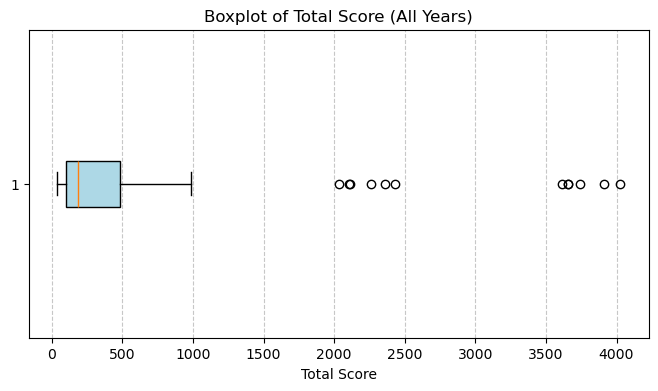

In [35]:
import matplotlib.pyplot as plt

# Boxplot for total_score to visualize outliers
plt.figure(figsize=(8, 4))
plt.boxplot(total_score_df["total_score"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title("Boxplot of Total Score (All Years)")
plt.xlabel("Total Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [36]:
# Step 2: num_universities = count of unique universities per country-year
num_univ_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(num_universities=("university", "nunique"))
)

print(num_univ_df.head())

   year    country  num_universities
0  2017  Argentina                 1
1  2017  Australia                15
2  2017    Austria                 3
3  2017    Belgium                 6
4  2017     Brazil                 2


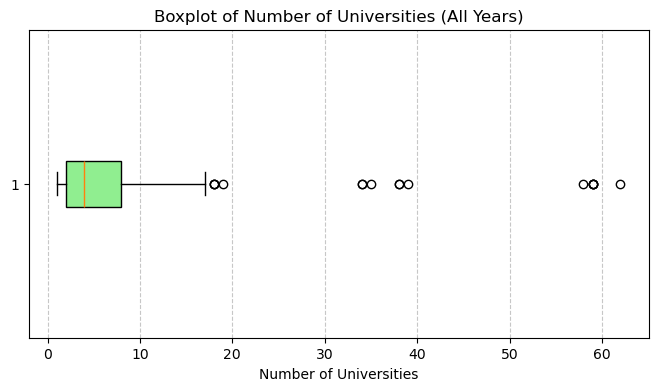

In [37]:
# Boxplot for num_universities
plt.figure(figsize=(8, 4))
plt.boxplot(num_univ_df["num_universities"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot of Number of Universities (All Years)")
plt.xlabel("Number of Universities")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [38]:
# Merge total_score and num_universities
agg_df = total_score_df.merge(num_univ_df, on=["year", "country"], how="left")
print(agg_df.head())

   year    country  total_score  num_universities
0  2017  Argentina         65.8                 1
1  2017  Australia        884.1                15
2  2017    Austria        139.0                 3
3  2017    Belgium        318.7                 6
4  2017     Brazil        107.0                 2


In [39]:
# avg_score = total_score / num_universities
agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

print(agg_df.head())

   year    country  total_score  num_universities  avg_score
0  2017  Argentina         65.8                 1  65.800000
1  2017  Australia        884.1                15  58.940000
2  2017    Austria        139.0                 3  46.333333
3  2017    Belgium        318.7                 6  53.116667
4  2017     Brazil        107.0                 2  53.500000


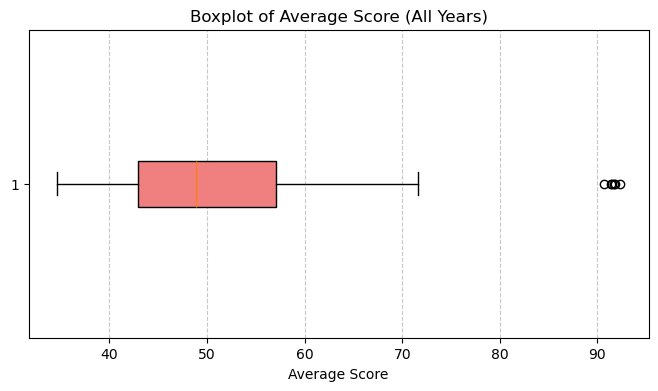

In [40]:
# Boxplot for avg_score
plt.figure(figsize=(8, 4))
plt.boxplot(agg_df["avg_score"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.title("Boxplot of Average Score (All Years)")
plt.xlabel("Average Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# avg_score = total_score / num_universities
agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

print(agg_df.head())

   year    country  total_score  num_universities  avg_score
0  2017  Argentina         65.8                 1  65.800000
1  2017  Australia        884.1                15  58.940000
2  2017    Austria        139.0                 3  46.333333
3  2017    Belgium        318.7                 6  53.116667
4  2017     Brazil        107.0                 2  53.500000


### Visualizations

In [43]:
# ---------- 1) Build the aggregated dataset from RAW df ----------
def build_agg_from_raw(df_clean: pd.DataFrame) -> pd.DataFrame:
    """
    Expects columns: ['university','year','score','country'].
    Returns agg_df with: ['year','country','total_score','num_universities','avg_score'].
    """
    need = {"university", "year", "score", "country"}
    missing = need - set(df_clean.columns)
    if missing:
        raise KeyError(f"Raw DF missing columns: {sorted(missing)}")

    df = df_clean.dropna(subset=["country", "year", "score", "university"]).copy()
    df["year"] = df["year"].astype(int)

    total_score_df = (
        df.groupby(["year", "country"], as_index=False)
          .agg(total_score=("score", "sum"))
    )
    num_univ_df = (
        df.groupby(["year", "country"], as_index=False)
          .agg(num_universities=("university", "nunique"))
    )

    agg_df = total_score_df.merge(num_univ_df, on=["year", "country"], how="left")
    agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]
    return agg_df

agg_df.to_csv("agg_university_metrics.csv", index=False)

# ---------- 2) Helper to get top-K per year ----------
def top_k_per_year(df_clean: pd.DataFrame, value_col: str, k: int = 10) -> pd.DataFrame:
    need = {"year", "country", value_col}
    if not need.issubset(df.columns):
        raise KeyError(f"DataFrame must contain: {sorted(need)}")
    return (
        df.sort_values(["year", value_col], ascending=[True, False], kind="mergesort")
          .groupby("year", group_keys=False)
          .head(k)
          .reset_index(drop=True)
    )

# ---------- 3) Plotters (one per metric) ----------
def plot_top10_total_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("total_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["total_score"])
        for i, v in enumerate(d["total_score"]):
            plt.text(v, i, f"{v:.1f}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Total Score ({y})")
        plt.xlabel("Total Score")
        plt.tight_layout()
        plt.show()


def plot_top10_avg_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("avg_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["avg_score"])
        # label with both avg and number of universities
        for i, (v, n) in enumerate(zip(d["avg_score"], d["num_universities"])):
            plt.text(v, i, f"{v:.1f}  |  {n} univ", va="center", ha="left")
        plt.title(f"Top {k} Countries by Average Score ({y})")
        plt.xlabel("Average Score per University")
        plt.tight_layout()
        plt.show()


def plot_top10_num_universities_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("num_universities", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["num_universities"])
        for i, v in enumerate(d["num_universities"]):
            plt.text(v, i, f"{v}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Number of Universities ({y})")
        plt.xlabel("Number of Universities")
        plt.tight_layout()
        plt.show()


# ---------- 4) Example usage ----------
# raw df name assumed to be `df` with cols: university, year, score, country
# agg_df = build_agg_from_raw(df)

# Tables (if you need them):
# top10_total = top_k_per_year(agg_df[["year","country","total_score"]], "total_score", k=10)
# top10_avg   = top_k_per_year(agg_df[["year","country","avg_score","num_universities"]], "avg_score", k=10)
# top10_count = top_k_per_year(agg_df[["year","country","num_universities"]], "num_universities", k=10)

# Plots:
# plot_top10_total_score_per_year(agg_df, k=10)
# plot_top10_avg_score_per_year(agg_df, k=10)
# plot_top10_num_universities_per_year(agg_df, k=10)

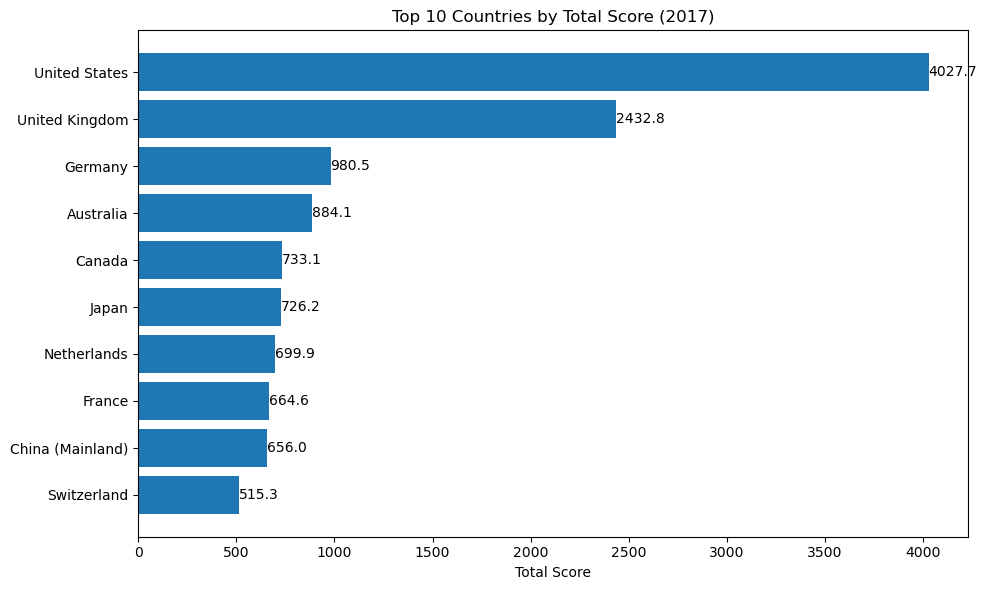

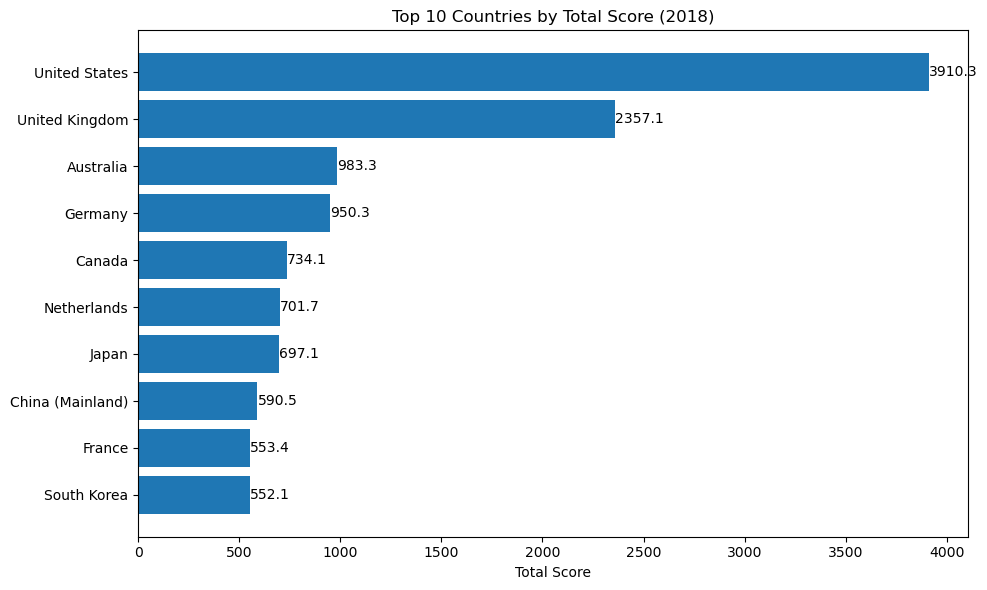

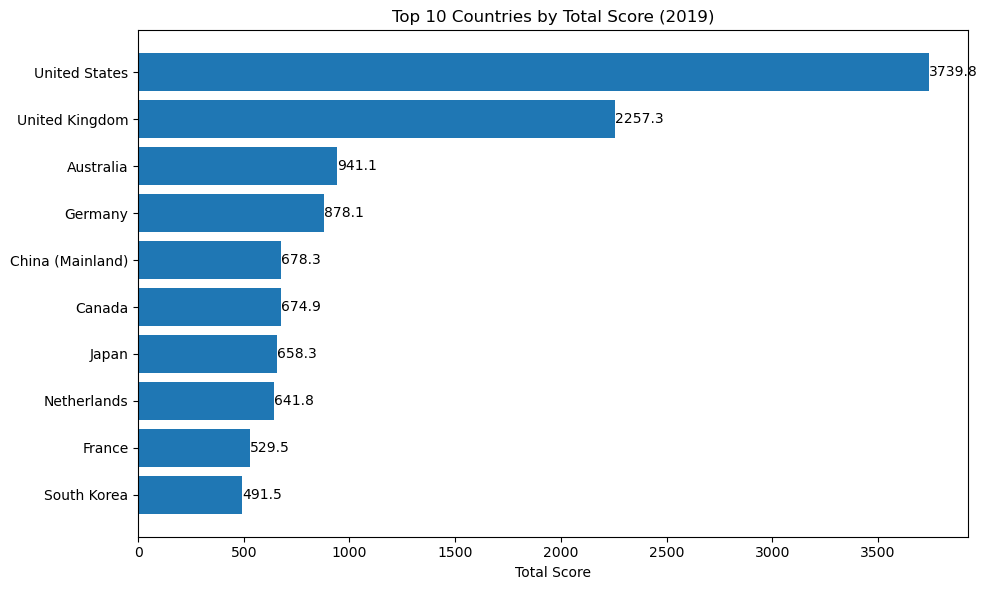

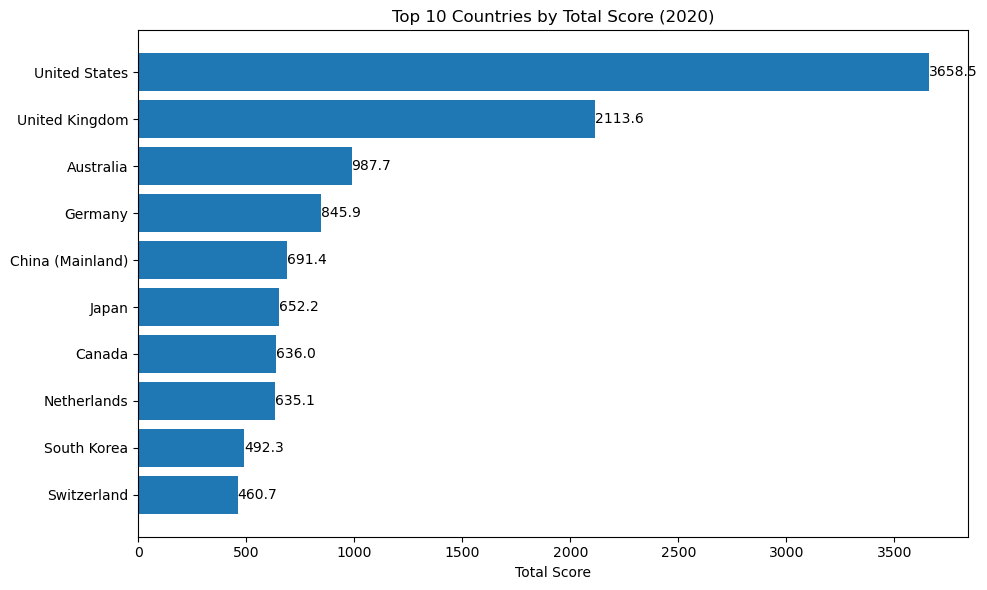

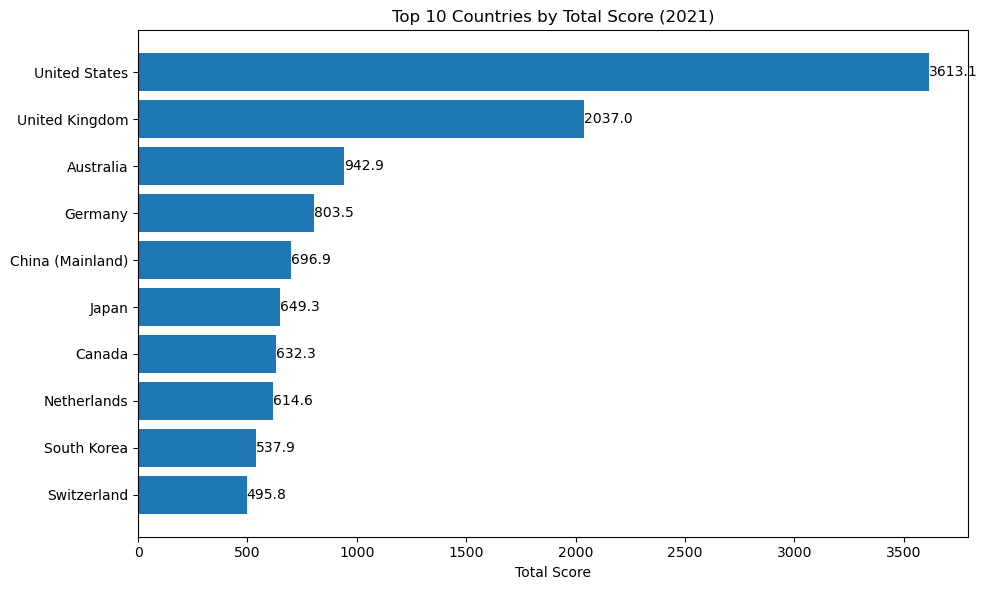

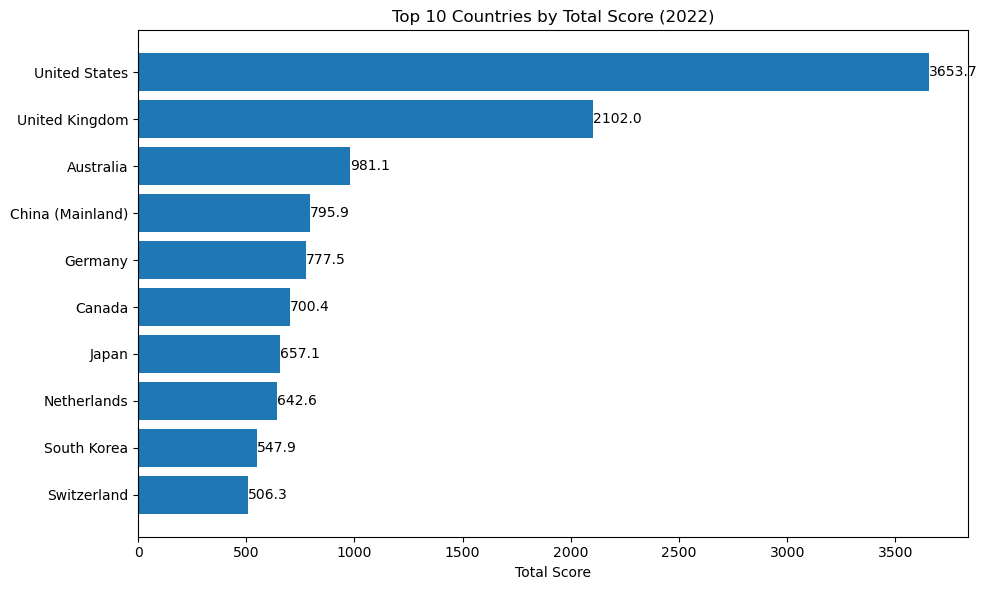

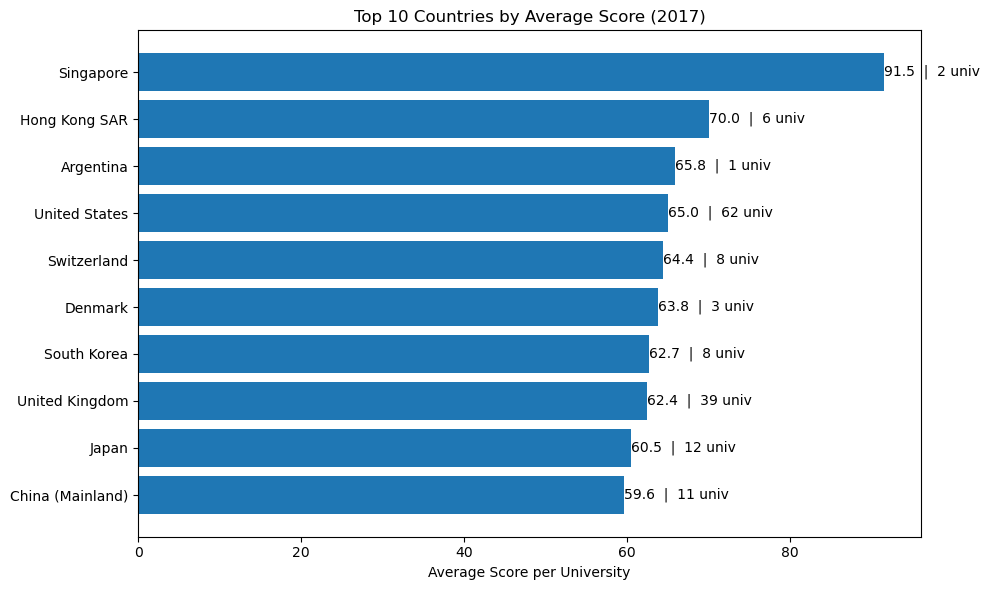

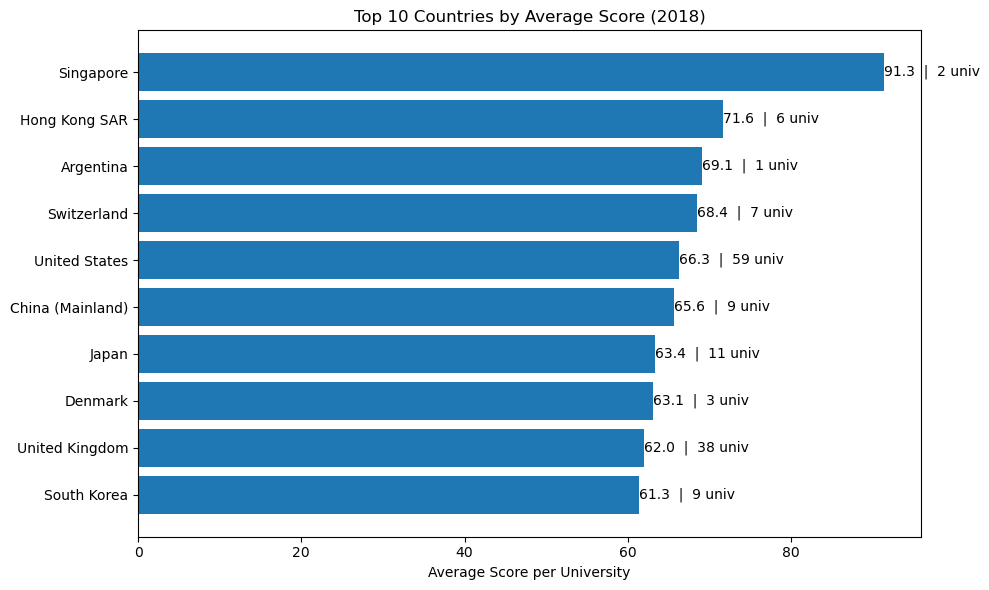

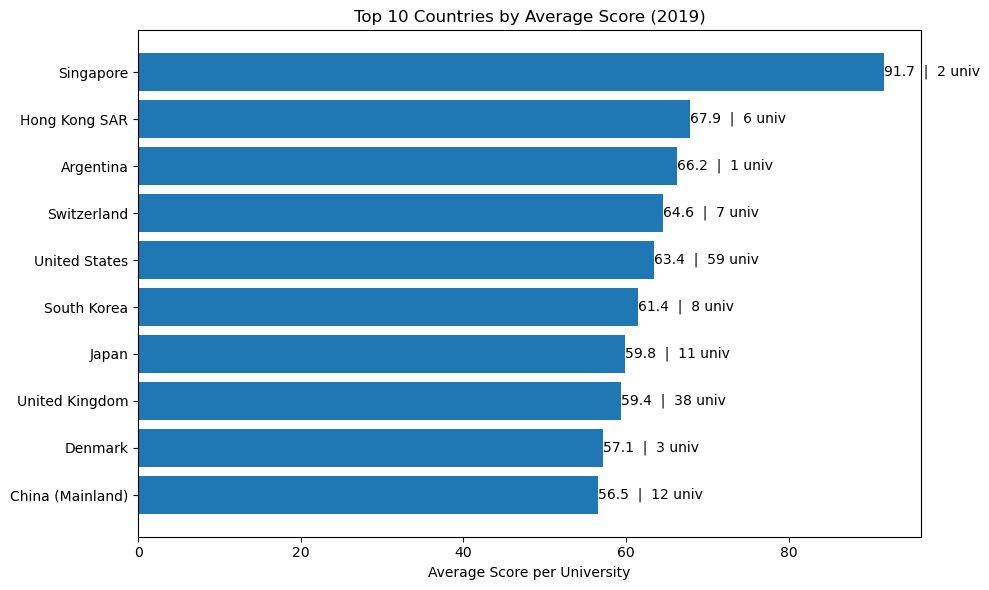

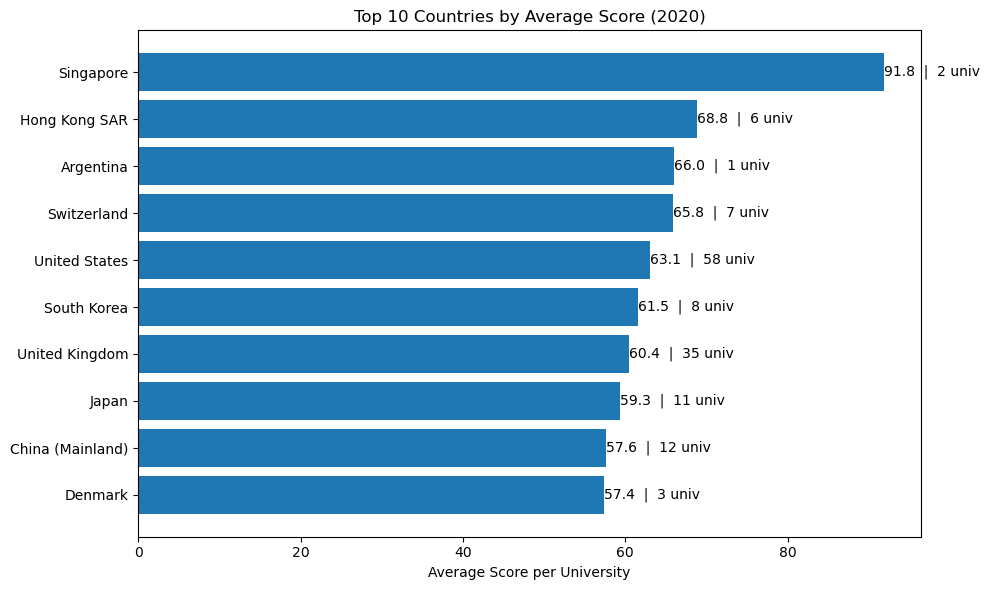

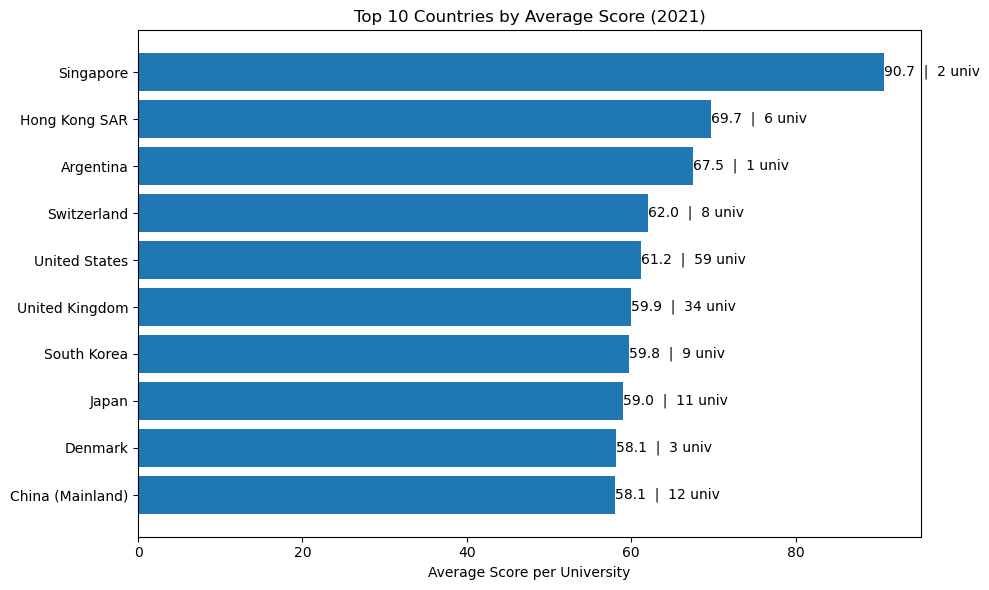

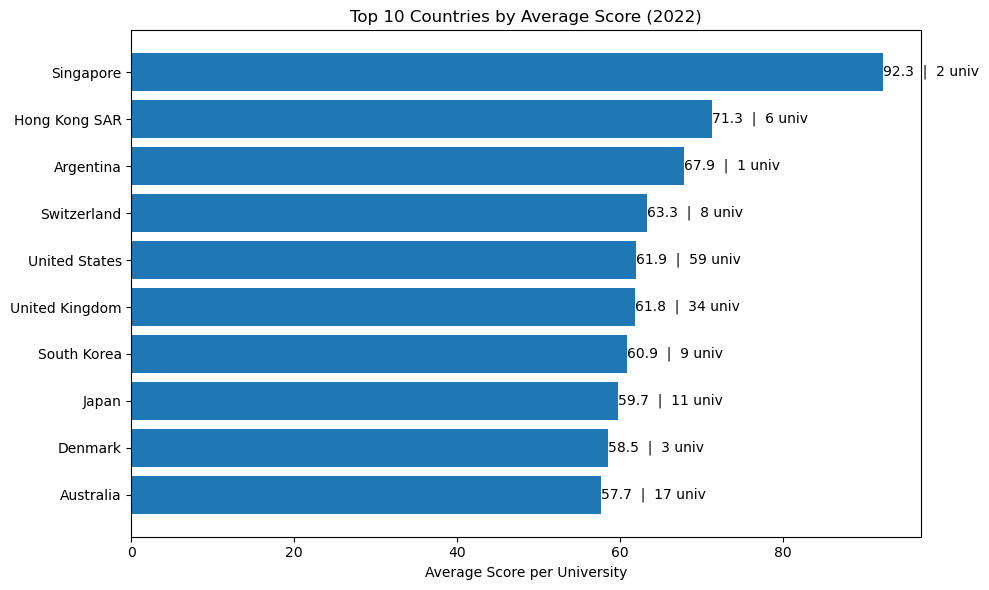

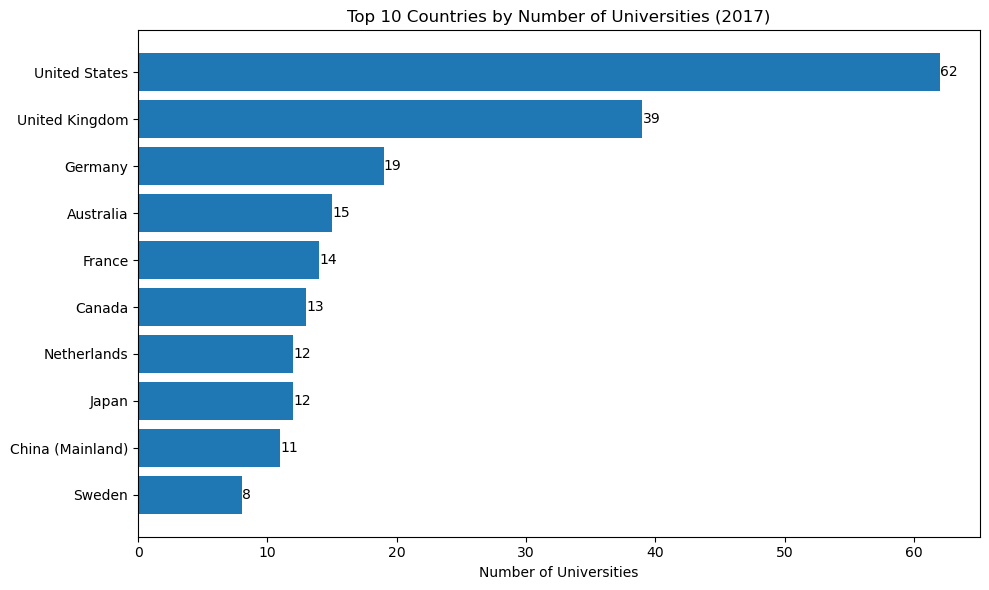

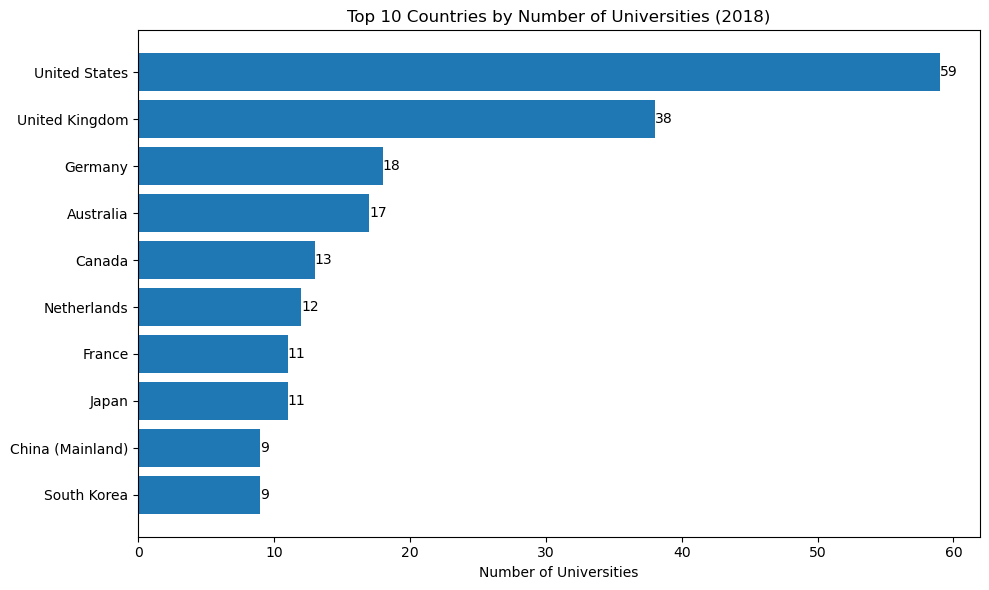

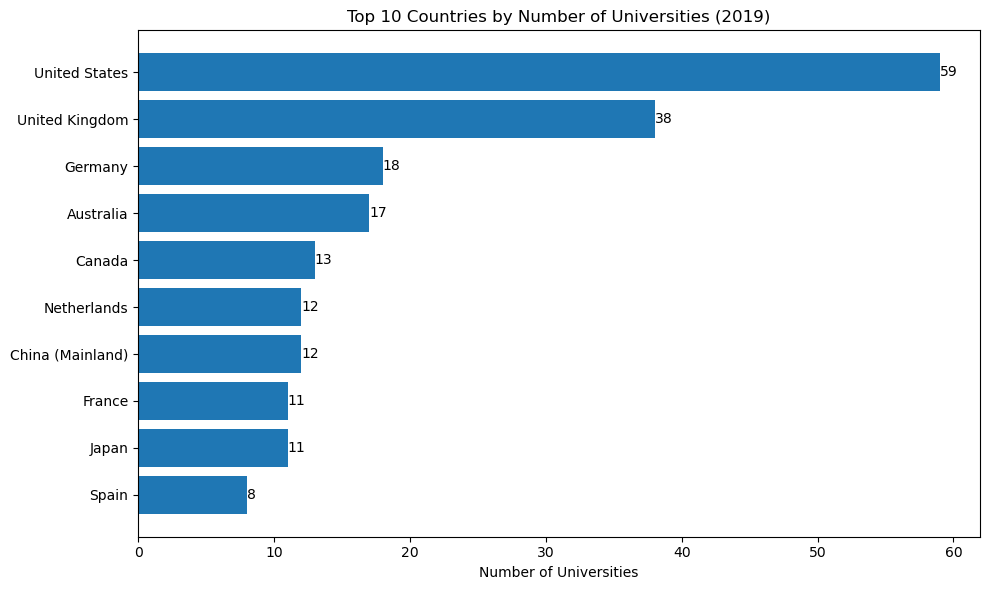

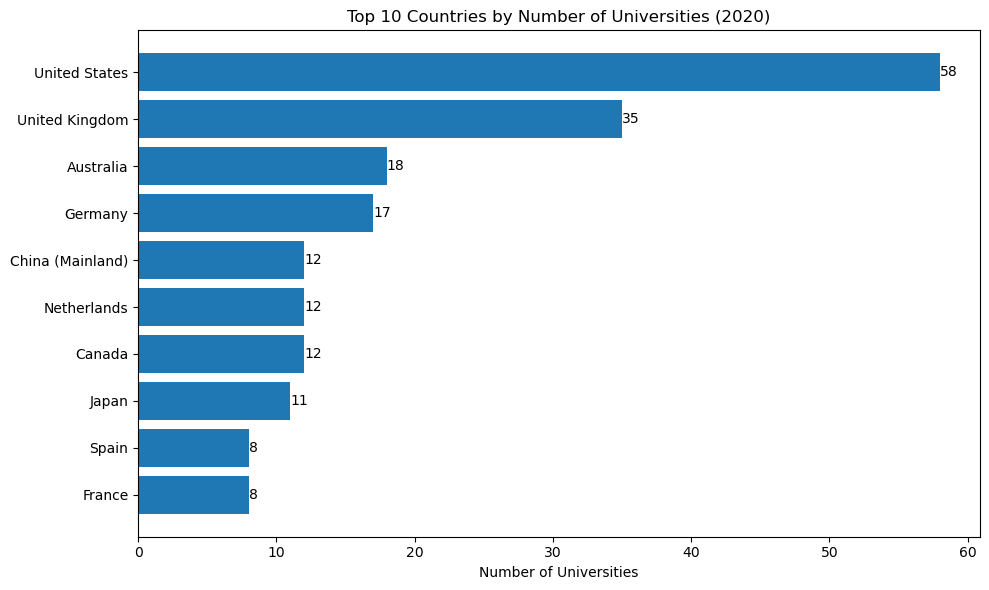

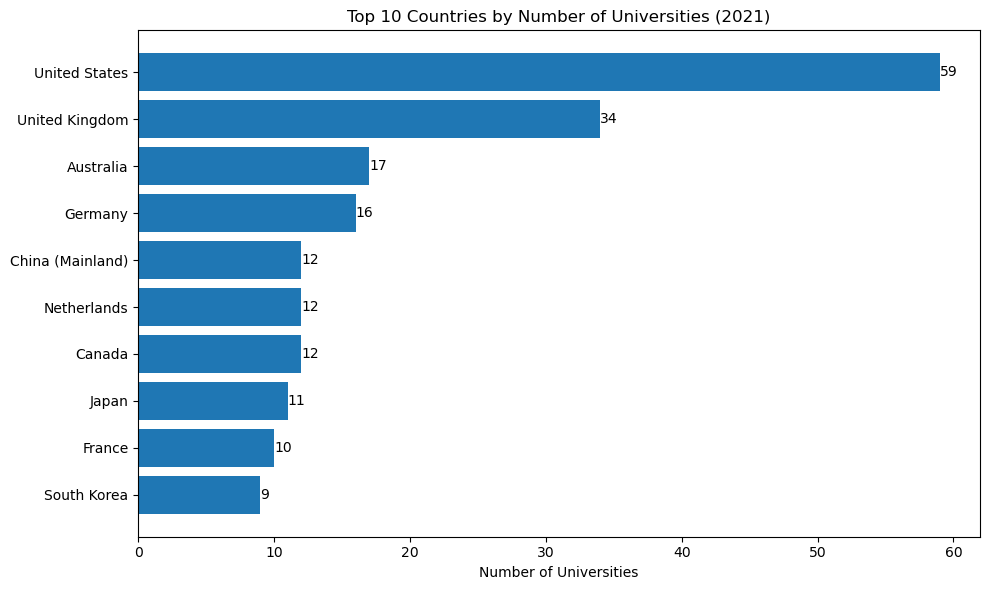

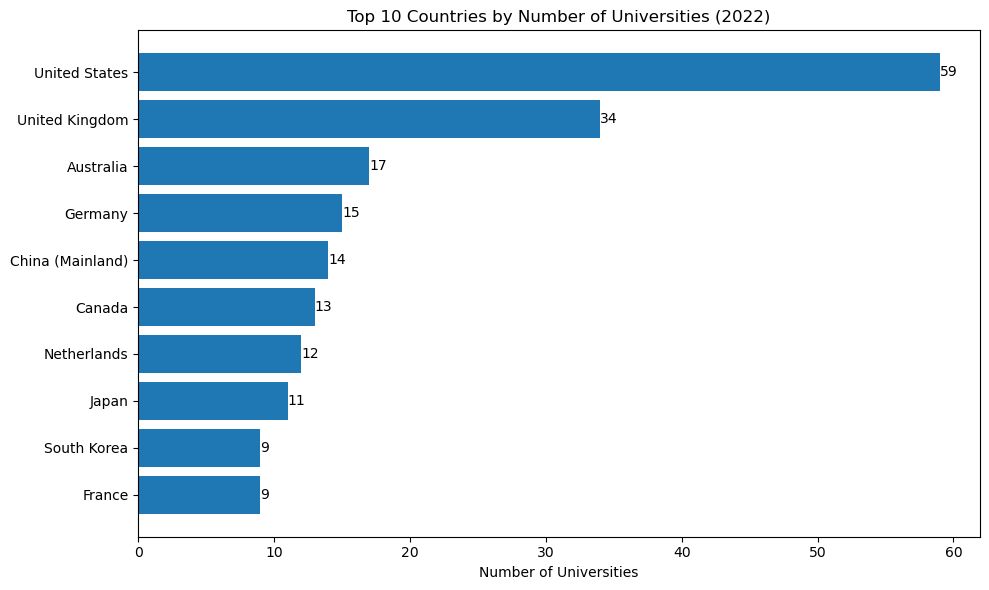

In [44]:
plot_top10_total_score_per_year(agg_df, k=10)
plot_top10_avg_score_per_year(agg_df, k=10)
plot_top10_num_universities_per_year(agg_df, k=10)

## Economic Correlation Analysis 

### Overview 
Correlate GDP per capita / total GDP with: Total_score

Methods:

Pearson correlation

Spearman correlation

Simple linear regression

Lagged GDP (t-1) vs score at time t

Scatter plots, heatmaps, and regression lines help here.

### Exploratory Data Analysis for Economic and Educational Indicators 
 

#### GDP 
For GDP dataset we will display basic information and summaries. We will show the number of countries, years covered and display sample rows. As part of the data overview we will

Check data types, missing values, and duplicate entries. Drop or impute missing scores (e.g., mean/linear interpolation). Fill missing GDP values (e.g., forward-fill or interpolate)

Standardize country names. Create a mapping dictionary to ensure consistency between datasets

Drop or flag outliers. Identify countries with extremely low or high scores. Detect GDP outliers using IQR or Z-score. 
Feature Engineering
GDP per capita (GDP ÷ population if available). Score change rate year-over-year (∆Score). GDP growth rate


In [49]:
df_gdp = pd.read_csv("data/gdp.csv")

In [50]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


In [51]:
df_gdp.head(5)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,174.930991430166,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.230435515505,1160.42047054038,3981.72662261867,4168.37544462548,4614.0479692596,5365.48880180298,5460.4305086932,5370.77749956875,6413.28280828537,6846.42669381643,8575.17134637222,10011.6279856667
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2445.18332740258,1772.92869122761,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4961.55257664733,5364.02795022731,5631.17999109851
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19563.6574722488,21810.2487431414,38654.9347203095,40129.8192007698,40672.9943348258,42819.7745797624,41257.8045846483,37361.0900666982,42425.6996756291,42414.0590092117,46812.4484486309,49303.6733899464


In [52]:
df_gdp.isna().sum()

Series Name      3
Series Code      5
Country Name     5
Country Code     5
1990 [YR1990]    5
2000 [YR2000]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
2024 [YR2024]    5
dtype: int64

In [53]:
df_gdp.isna().mean() * 100

Series Name      1.107011
Series Code      1.845018
Country Name     1.845018
Country Code     1.845018
1990 [YR1990]    1.845018
2000 [YR2000]    1.845018
2015 [YR2015]    1.845018
2016 [YR2016]    1.845018
2017 [YR2017]    1.845018
2018 [YR2018]    1.845018
2019 [YR2019]    1.845018
2020 [YR2020]    1.845018
2021 [YR2021]    1.845018
2022 [YR2022]    1.845018
2023 [YR2023]    1.845018
2024 [YR2024]    1.845018
dtype: float64

In [54]:
df_gdp[df_gdp.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,Last Updated: 07/01/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_gdp = df_gdp.replace(r"^\s*\.\.\s*$", np.nan, regex=True)

In [56]:
df_gdp.isna().sum()

Series Name       3
Series Code       5
Country Name      5
Country Code      5
1990 [YR1990]    31
2000 [YR2000]    19
2015 [YR2015]    12
2016 [YR2016]    13
2017 [YR2017]    13
2018 [YR2018]    13
2019 [YR2019]    12
2020 [YR2020]    13
2021 [YR2021]    13
2022 [YR2022]    14
2023 [YR2023]    22
2024 [YR2024]    39
dtype: int64

In [57]:
# First, replace ".." with NaN if you haven't already
import numpy as np
df_gdp = df_gdp.replace(r"^\s*\.\.\s*$", np.nan, regex=True)

# Convert numeric year columns to float
year_cols = [col for col in df_gdp.columns if "[YR" in col]
df_gdp[year_cols] = df_gdp[year_cols].astype(float)

# Interpolate row-wise across years
df_gdp[year_cols] = df_gdp[year_cols].interpolate(axis=1, limit_direction="both")

In [58]:
df_gdp.isna().sum()

Series Name      3
Series Code      5
Country Name     5
Country Code     5
1990 [YR1990]    9
2000 [YR2000]    9
2015 [YR2015]    9
2016 [YR2016]    9
2017 [YR2017]    9
2018 [YR2018]    9
2019 [YR2019]    9
2020 [YR2020]    9
2021 [YR2021]    9
2022 [YR2022]    9
2023 [YR2023]    9
2024 [YR2024]    9
dtype: int64

In [59]:
df_gdp[df_gdp.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
27,GDP per capita (current US$),NY.GDP.PCAP.CD,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,GDP per capita (current US$),NY.GDP.PCAP.CD,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,GDP per capita (current US$),NY.GDP.PCAP.CD,"Korea, Dem. People's Rep.",PRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,GDP per capita (current US$),NY.GDP.PCAP.CD,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,Last Updated: 07/01/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Keep only GDP per capita (current US$)
gdp_filtered = df_gdp[df_gdp["Series Name"] == "GDP per capita (current US$)"].copy()

# Drop unneeded columns
gdp_filtered = gdp_filtered.drop(columns=["Country Code", "Series Code", "Series Name"], errors="ignore")
gdp_filtered = gdp_filtered.loc[:, ~gdp_filtered.columns.str.contains("^Unnamed")]

# Reshape from wide to long format
gdp_long = gdp_filtered.melt(id_vars=["Country Name"], var_name="year", value_name="gdp_per_capita")

# Clean year strings like "2017 [YR2017]" -> "2017"
gdp_long["year"] = gdp_long["year"].str.extract(r"(\d{4})")

# Continue with steps
gdp_long = gdp_long.rename(columns={"Country Name": "country"})
gdp_long["year"] = pd.to_numeric(gdp_long["year"], errors="coerce")
gdp_long = gdp_long.dropna(subset=["year", "gdp_per_capita"])
gdp_long["year"] = gdp_long["year"].astype(int)

# Filter for 2017–2024
gdp_long = gdp_long[gdp_long["year"].between(2017, 2024)]

gdp_long.head(10)

,country,year,gdp_per_capita
1064,Afghanistan,2017,525.469771
1065,Albania,2017,4614.047969
1066,Algeria,2017,4554.667540
1067,American Samoa,2017,11863.683945
1068,Andorra,2017,40672.994335
1069,Angola,2017,2437.259712
1070,Antigua and Barbuda,2017,16965.728827
1071,Argentina,2017,14532.500931
1072,Armenia,2017,3869.053739
1073,Aruba,2017,28440.051964


#### Goverment Expenditures on Education

In [62]:
# Load dataset
edu_df = pd.read_csv("data/gov_exp_on_edu.csv")

In [63]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


In [64]:
edu_df.head(5)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Afghanistan,AFG,..,..,3.2558000087738,4.54397010803223,4.34319019317627,..,..,..,..,..,..,..
1,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Albania,ALB,..,3.4301700592041,3.43796992301941,3.96209001541138,3.61172008514404,3.15294480323792,3.91623997688293,3.3422999382019,3.02255988121033,2.74432992935181,..,..
2,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Algeria,DZA,..,..,6.17633008956909,6.50210857391357,5.73482370376587,5.81275129318237,5.57536554336548,6.1939172744751,5.51403284072876,4.74924659729004,5.61015701293945,..
3,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Andorra,AND,..,..,3.28034996986389,3.23707008361816,3.21708989143372,3.2467200756073,3.15060997009277,2.63213038444519,2.58397221565247,2.64728999137878,1.92790997028351,..


In [65]:
edu_df = edu_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)

C:\Users\User\AppData\Local\Temp\ipykernel_14892\2514134597.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edu_df = edu_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)


In [66]:
edu_df.isna().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
1990 [YR1990]    209
2000 [YR2000]     99
2015 [YR2015]     58
2016 [YR2016]     57
2017 [YR2017]     54
2018 [YR2018]     60
2019 [YR2019]     58
2020 [YR2020]     62
2021 [YR2021]     63
2022 [YR2022]    100
2023 [YR2023]    201
2024 [YR2024]    271
dtype: int64

In [67]:
# 1. Replace ".." placeholders with NaN
edu_df = edu_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).convert_dtypes()

# 2. Drop the years with excessive missing values
cols_to_drop = ["1990 [YR1990]", "2024 [YR2024]"]
edu_df = edu_df.drop(columns=cols_to_drop, errors="ignore")

# 3. Interpolate missing values for the remaining year columns
year_cols = [col for col in edu_df.columns if "[YR" in col]
edu_df[year_cols] = edu_df[year_cols].astype(float).interpolate(
    axis=1, method="linear", limit_direction="both"
)
# 4. (Optional) Check remaining missing values
missing_summary = edu_df[year_cols].isna().sum()
print(missing_summary)

2000 [YR2000]    34
2015 [YR2015]    34
2016 [YR2016]    34
2017 [YR2017]    34
2018 [YR2018]    34
2019 [YR2019]    34
2020 [YR2020]    34
2021 [YR2021]    34
2022 [YR2022]    34
2023 [YR2023]    34
dtype: int64


Explanation
Step 1 cleans the placeholder values and fixes data types so interpolation works correctly.

Step 2 removes the problematic years (1990 and 2024).

Step 3 performs row-wise linear interpolation across years so that missing values are filled using values from adjacent years.

Step 4 lets you confirm if any missing values remain after interpolation.

In [69]:
edu_df[edu_df.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Curacao,CUW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Equatorial Guinea,GNQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Eritrea,ERI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,French Polynesia,PYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Greenland,GRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Guam,GUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Step 2: Keep only education expenditure rows
edu_filtered = edu_df[
    edu_df["Series Name"] == "Government expenditure on education, total (% of GDP)"
].copy()

# Step 3: Drop unneeded columns
edu_filtered = edu_filtered.drop(
    columns=["Country Code", "Series Code", "Series Name"], errors="ignore"
)

# Remove unnamed columns if any
edu_filtered = edu_filtered.loc[:, ~edu_filtered.columns.str.contains("^Unnamed")]

# Step 4: Reshape from wide to long format
edu_long = edu_filtered.melt(
    id_vars=["Country Name"], var_name="year", value_name="gov_exp_edu"
)

# Extract just the year number from "2017 [YR2017]"
edu_long["year"] = edu_long["year"].str.extract(r"(\d{4})")

# Rename country column
edu_long = edu_long.rename(columns={"Country Name": "country"})

# Convert to numeric types
edu_long["year"] = pd.to_numeric(edu_long["year"], errors="coerce")
edu_long["gov_exp_edu"] = pd.to_numeric(edu_long["gov_exp_edu"], errors="coerce")

# Drop missing values
edu_long = edu_long.dropna(subset=["year", "gov_exp_edu"])

# Convert year to int
edu_long["year"] = edu_long["year"].astype(int)

# Filter only 2017–2024
edu_long = edu_long[edu_long["year"].between(2017, 2023)]

print(edu_long.dtypes)
print(edu_long.head(10))

country        string[python]
year                    int32
gov_exp_edu           float64
dtype: object
                 country  year  gov_exp_edu
798          Afghanistan  2017     4.343190
799              Albania  2017     3.611720
800              Algeria  2017     5.734824
802              Andorra  2017     3.217090
803               Angola  2017     2.466879
804  Antigua and Barbuda  2017     2.365928
805            Argentina  2017     5.454320
806              Armenia  2017     2.707590
807                Aruba  2017     4.456181
808            Australia  2017     5.321256


#### Gov. Effectivness

In [72]:
# Load dataset
gov_df = pd.read_csv("data/Gov_effect_score .csv")

In [73]:
gov_df = gov_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)

C:\Users\User\AppData\Local\Temp\ipykernel_14892\2839557330.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gov_df = gov_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)


In [74]:
gov_df.isna().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
1990 [YR1990]    271
2000 [YR2000]     90
2015 [YR2015]     66
2016 [YR2016]     66
2017 [YR2017]     66
2018 [YR2018]     66
2019 [YR2019]     66
2020 [YR2020]     66
2021 [YR2021]     66
2022 [YR2022]     66
2023 [YR2023]     66
2024 [YR2024]    271
dtype: int64

In [75]:
# 1. Replace ".." placeholders with NaN
gov_df = gov_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).convert_dtypes()

# 2. Drop the years with excessive missing values
cols_to_drop = ["1990 [YR1990]", "2024 [YR2024]"]
gov_df = gov_df.drop(columns=cols_to_drop, errors="ignore")

# 3. Interpolate missing values for the remaining year columns
year_cols = [col for col in gov_df.columns if "[YR" in col]
gov_df[year_cols] = gov_df[year_cols].astype(float).interpolate(
    axis=1, method="linear", limit_direction="both"
)
# 4. (Optional) Check remaining missing values
missing_summary = gov_df[year_cols].isna().sum()
print(missing_summary)

2000 [YR2000]    66
2015 [YR2015]    66
2016 [YR2016]    66
2017 [YR2017]    66
2018 [YR2018]    66
2019 [YR2019]    66
2020 [YR2020]    66
2021 [YR2021]    66
2022 [YR2022]    66
2023 [YR2023]    66
dtype: int64


In [76]:
gov_df[gov_df.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
27,Government Effectiveness: Percentile Rank,GE.PER.RNK,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Government Effectiveness: Percentile Rank,GE.PER.RNK,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Government Effectiveness: Percentile Rank,GE.PER.RNK,Curacao,CUW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Government Effectiveness: Percentile Rank,GE.PER.RNK,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Government Effectiveness: Percentile Rank,GE.PER.RNK,French Polynesia,PYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Step 1: Keep only Government Effectiveness rows
gov_eff_filtered = gov_df[
    gov_df["Series Name"] == "Government Effectiveness: Percentile Rank"
].copy()

# Step 2: Drop unneeded columns
gov_eff_filtered = gov_eff_filtered.drop(
    columns=["Country Code", "Series Code", "Series Name"], errors="ignore"
)

# Remove unnamed columns if any
gov_eff_filtered = gov_eff_filtered.loc[:, ~gov_eff_filtered.columns.str.contains("^Unnamed")]

# Step 3: Reshape from wide to long format
gov_eff_long = gov_eff_filtered.melt(
    id_vars=["Country Name"], var_name="year", value_name="gov_effectiveness"
)

# Extract year number from "2017 [YR2017]"
gov_eff_long["year"] = gov_eff_long["year"].str.extract(r"(\d{4})")

# Rename for consistency
gov_eff_long = gov_eff_long.rename(columns={"Country Name": "country"})

# Convert to numeric
gov_eff_long["year"] = pd.to_numeric(gov_eff_long["year"], errors="coerce")
gov_eff_long["gov_effectiveness"] = pd.to_numeric(gov_eff_long["gov_effectiveness"], errors="coerce")

# Drop missing values
gov_eff_long = gov_eff_long.dropna(subset=["year", "gov_effectiveness"])

# Ensure year is integer
gov_eff_long["year"] = gov_eff_long["year"].astype(int)

# Filter for years 2017–2024
gov_eff_long = gov_eff_long[gov_eff_long["year"].between(2017, 2023)]

print(gov_eff_long.dtypes)
print(gov_eff_long.head(10))

country              string[python]
year                          int32
gov_effectiveness           float64
dtype: object
                 country  year  gov_effectiveness
798          Afghanistan  2017           7.142857
799              Albania  2017          57.619049
800              Algeria  2017          31.428572
801       American Samoa  2017          70.476189
802              Andorra  2017          98.095238
803               Angola  2017          17.142857
804  Antigua and Barbuda  2017          51.904762
805            Argentina  2017          58.571430
806              Armenia  2017          42.380951
807                Aruba  2017          78.095238


#### Rsearch and Development

In [79]:
# Load dataset
res_df = pd.read_csv("data/res_dev.csv")  

In [80]:
res_df = res_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)

C:\Users\User\AppData\Local\Temp\ipykernel_14892\3805319731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res_df = res_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)


In [81]:
res_df.isna().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
1990 [YR1990]    271
2000 [YR2000]    172
2015 [YR2015]    139
2016 [YR2016]    153
2017 [YR2017]    147
2018 [YR2018]    150
2019 [YR2019]    145
2020 [YR2020]    157
2021 [YR2021]    162
2022 [YR2022]    175
2023 [YR2023]    244
2024 [YR2024]    271
dtype: int64

In [82]:
# 1. Replace ".." placeholders with NaN
res_df = res_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).convert_dtypes()

# 2. Drop the years with excessive missing values
cols_to_drop = ["1990 [YR1990]", "2024 [YR2024]"]
res_df = res_df.drop(columns=cols_to_drop, errors="ignore")

# 3. Interpolate missing values for the remaining year columns
year_cols = [col for col in res_df.columns if "[YR" in col]
res_df[year_cols] = res_df[year_cols].astype(float).interpolate(
    axis=1, method="linear", limit_direction="both"
)
# 4. (Optional) Check remaining missing values
missing_summary = res_df[year_cols].isna().sum()
print(missing_summary)

2000 [YR2000]    107
2015 [YR2015]    107
2016 [YR2016]    107
2017 [YR2017]    107
2018 [YR2018]    107
2019 [YR2019]    107
2020 [YR2020]    107
2021 [YR2021]    107
2022 [YR2022]    107
2023 [YR2023]    107
dtype: int64


In [83]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    268 non-null    string 
 1   Series Code    266 non-null    string 
 2   Country Name   266 non-null    string 
 3   Country Code   266 non-null    string 
 4   2000 [YR2000]  164 non-null    float64
 5   2015 [YR2015]  164 non-null    float64
 6   2016 [YR2016]  164 non-null    float64
 7   2017 [YR2017]  164 non-null    float64
 8   2018 [YR2018]  164 non-null    float64
 9   2019 [YR2019]  164 non-null    float64
 10  2020 [YR2020]  164 non-null    float64
 11  2021 [YR2021]  164 non-null    float64
 12  2022 [YR2022]  164 non-null    float64
 13  2023 [YR2023]  164 non-null    float64
dtypes: float64(10), string(4)
memory usage: 29.8 KB


In [84]:
# Step 1: Keep only R&D expenditure rows
rd_exp_filtered = res_df[
    res_df["Series Name"] == "Research and development expenditure (% of GDP)"
].copy()

# Step 2: Drop unneeded columns
rd_exp_filtered = rd_exp_filtered.drop(
    columns=["Country Code", "Series Code", "Series Name"], errors="ignore"
)

# Remove unnamed columns if any
rd_exp_filtered = rd_exp_filtered.loc[:, ~rd_exp_filtered.columns.str.contains("^Unnamed")]

# Step 3: Reshape from wide to long format
rd_exp_long = rd_exp_filtered.melt(
    id_vars=["Country Name"], var_name="year", value_name="rd_exp_gdp"
)

# Extract year number from "2017 [YR2017]"
rd_exp_long["year"] = rd_exp_long["year"].str.extract(r"(\d{4})")

# Rename for consistency
rd_exp_long = rd_exp_long.rename(columns={"Country Name": "country"})

# Convert to numeric
rd_exp_long["year"] = pd.to_numeric(rd_exp_long["year"], errors="coerce")
rd_exp_long["rd_exp_gdp"] = pd.to_numeric(rd_exp_long["rd_exp_gdp"], errors="coerce")

# Drop missing values
rd_exp_long = rd_exp_long.dropna(subset=["year", "rd_exp_gdp"])

# Ensure year is integer
rd_exp_long["year"] = rd_exp_long["year"].astype(int)

# Filter for years 2017–2023
rd_exp_long = rd_exp_long[rd_exp_long["year"].between(2017, 2023)]

print(rd_exp_long.dtypes)
print(rd_exp_long.head(10))

country       string[python]
year                   int32
rd_exp_gdp           float64
dtype: object
        country  year  rd_exp_gdp
800     Algeria  2017    0.478650
803      Angola  2017    0.032290
805   Argentina  2017    0.556310
806     Armenia  2017    0.227880
808   Australia  2017    1.879190
809     Austria  2017    3.056560
810  Azerbaijan  2017    0.184680
815     Belarus  2017    0.584110
816     Belgium  2017    2.666660
819     Bermuda  2017    0.217363


In [85]:
rd_exp_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 800 to 2659
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1148 non-null   string 
 1   year        1148 non-null   int32  
 2   rd_exp_gdp  1148 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 31.4 KB


#### Primary

#### Secondary 

#### Tertiary 

### Correlation Insights

#### Overview Compute and visualize: Pearson & Spearman correlation between:

Heatmaps of correlation matrix

Optional: Scatter plots with regression line (GDP vs Score)

Key Analyses & Visuals Distribution of Country Rankings

Histogram of average ranks across countries. Boxplots grouped by income level or region. Correlation Heatmap

Pearson correlations between:Average QS rank GDP per capita Literacy rate R&D expenditure

Time Series Trends

Line plots for selected countries showing:

Rank trend (2017–2022) GDP/literacy/R&D over time

Top & Bottom Performers Table or bar plot of top 10 and bottom 10 countries by average rank.

Scatterplots GDP vs. rank, Literacy vs. rank, R&D vs. rank

Add regression line and confidence interval.

Interpretation Example: "Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

#### GDP

In [92]:
# Merge GDP with ranking stats
merged_df = pd.merge(gdp_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df.head(10)

,country,year,gdp_per_capita,total_score
0,Argentina,2017,14532.500931,65.8
1,Australia,2017,53901.714539,884.1
2,Austria,2017,47163.742578,139.0
3,Belgium,2017,44035.323936,318.7
4,Brazil,2017,10080.509282,107.0
5,Canada,2017,45129.628117,733.1
6,Chile,2017,14879.908623,101.4
7,Colombia,2017,6479.532313,77.4
8,Denmark,2017,57521.551499,191.5
9,Finland,2017,46085.017474,164.5


In [93]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Clean numeric conversion
def to_numeric(series):
    return pd.to_numeric(series, errors="coerce")

# Ensure numeric
merged_df['total_score'] = to_numeric(merged_df['total_score'])
merged_df['gdp_per_capita'] = to_numeric(merged_df['gdp_per_capita'])

# Drop missing rows
corr_df = merged_df.dropna(subset=['total_score', 'gdp_per_capita'])

# Pearson
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['gdp_per_capita'])

# Spearman
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['gdp_per_capita'])

# Kendall
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['gdp_per_capita'])

print("=== Correlation with GDP per Capita ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with GDP per Capita ===
Pearson:  r = 0.3032, p = 4.89e-06
Spearman: rho = 0.5255, p = 6.023e-17
Kendall:  tau = 0.3746, p = 1.617e-16


#### Goverment Expenditures on Edu

In [95]:
# Merge GDP with ranking stats
merged_df_edu = pd.merge(edu_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df_edu.head(10)

,country,year,gov_exp_edu,total_score
0,Argentina,2017,5.454320,65.8
1,Australia,2017,5.321256,884.1
2,Austria,2017,5.371590,139.0
3,Belgium,2017,6.425340,318.7
4,Brazil,2017,6.320480,107.0
5,Canada,2017,4.959970,733.1
6,Chile,2017,5.432790,101.4
7,Colombia,2017,3.511210,77.4
8,Denmark,2017,7.115860,191.5
9,Finland,2017,6.363110,164.5


In [96]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Ensure numeric
merged_df_edu['total_score'] = pd.to_numeric(merged_df_edu['total_score'], errors='coerce')
merged_df_edu['gov_exp_edu'] = pd.to_numeric(merged_df_edu['gov_exp_edu'], errors='coerce')

# Drop missing rows
corr_df = merged_df_edu.dropna(subset=['total_score', 'gov_exp_edu'])

# Pearson
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['gov_exp_edu'])

# Spearman
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['gov_exp_edu'])

# Kendall
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['gov_exp_edu'])

print("=== Correlation with Government Expenditure on Education ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with Government Expenditure on Education ===
Pearson:  r = 0.1182, p = 0.08086
Spearman: rho = 0.2294, p = 0.0006235
Kendall:  tau = 0.1600, p = 0.0004323


#### Goverment Effectivness

In [98]:
# Merge Gov effectivness with ranking stats
merged_df_gov = pd.merge(gov_eff_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df_gov.head(5)

,country,year,gov_effectiveness,total_score
0,Argentina,2017,58.571430,65.8
1,Australia,2017,91.428574,884.1
2,Austria,2017,90.952377,139.0
3,Belgium,2017,85.714287,318.7
4,Brazil,2017,40.000000,107.0


In [99]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Ensure numeric
merged_df_gov['total_score'] = pd.to_numeric(merged_df_gov['total_score'], errors='coerce')
merged_df_gov['gov_effectiveness'] = pd.to_numeric(merged_df_gov['gov_effectiveness'], errors='coerce')

# Drop missing rows
corr_df = merged_df_gov.dropna(subset=['total_score', 'gov_effectiveness'])

# Pearson
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['gov_effectiveness'])

# Spearman
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['gov_effectiveness'])

# Kendall
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['gov_effectiveness'])

print("=== Correlation with Government Effectiveness ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with Government Effectiveness ===
Pearson:  r = 0.2974, p = 7.534e-06
Spearman: rho = 0.5589, p = 2.161e-19
Kendall:  tau = 0.3668, p = 8.106e-16


#### Research and Development 

In [101]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import pandas as pd

# Assuming:
# rd_exp_long → cleaned dataset with ['country', 'year', 'rd_exp_gdp']
# merged_df   → main dataset with ['country', 'year', 'total_score']

# --- Merge R&D data into main dataset ---
merged_rd = pd.merge(
    merged_df,
    rd_exp_long,
    on=["country", "year"],
    how="inner"
)

# Ensure numeric types
merged_rd['total_score'] = pd.to_numeric(merged_rd['total_score'], errors='coerce')
merged_rd['rd_exp_gdp'] = pd.to_numeric(merged_rd['rd_exp_gdp'], errors='coerce')

# Drop NaNs
corr_df = merged_rd.dropna(subset=['total_score', 'rd_exp_gdp'])

# --- Pearson ---
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['rd_exp_gdp'])

# --- Spearman ---
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['rd_exp_gdp'])

# --- Kendall ---
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['rd_exp_gdp'])

# --- Print ---
print("=== Correlation with R&D Expenditure (% of GDP) ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with R&D Expenditure (% of GDP) ===
Pearson:  r = 0.3576, p = 8.018e-08
Spearman: rho = 0.6235, p = 2.432e-24
Kendall:  tau = 0.4143, p = 2.512e-19


### Visualizations

### Analysis

In [104]:
import pandas as pd
import statsmodels.api as sm

# Merge your datasets (ensure GDP and total_score match in country-year)
merged_df = total_score_df.merge(gdp_long, on=["country", "year"], how="inner")

# Independent and dependent variables
X = merged_df["gdp_per_capita"]
y = merged_df["total_score"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     21.97
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           4.89e-06
Time:                        15:15:00   Log-Likelihood:                -1732.4
No. Observations:                 219   AIC:                             3469.
Df Residuals:                     217   BIC:                             3476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            102.5591     78.625      1.

## Total Score Prediction for 2023 Using Baseline and ARIMA Forecasting Models 

### Methods
- Moving Average

- Exponential Smoothing

- Holt-Winters (with trend & seasonality)

- ARIMA Choose parameters (p,d,q) using AIC/BIC, Forecast 2023 scores for each country

Include model selection, residual diagnostics, and forecast performance plots.

### Outputs

Forecast 2023 total score for each of top 10 countries. Compare predictions to actual 2023. 

Forecast Outputs Summarize predictions for 2024 from all models (as described in the comparison table above):

Plot bar graphs or line charts showing:

Predicted vs. actual, Model uncertainty (for Monte Carlo, Prophet, ARIMAX)

Model Evaluation If actual 2024 data is available: Use MAE, RMSE, and MAPE as metrics.

Compare performance across countries and models. Example Discussion Points: "Monte Carlo and ARIMAX produced the lowest MAE for high-ranking countries." "Prophet struggled in countries with unstable GDP trends." "Linear trend was consistent but less sensitive to economic shifts."

In [107]:
# Forecasting by moving average and linear forecast

# ---- 1) Time-index helpers ----
def yearly_series(group, value_col="total_score"):
    """Regular annual PeriodIndex series with freq=Y-DEC. Interpolates gaps."""
    g = group.sort_values("year")
    s = g.set_index(pd.PeriodIndex(g["year"].astype(int), freq="Y-DEC"))[value_col]
    s = s.asfreq("Y-DEC")
    if s.isna().any():
        s = s.interpolate(limit_direction="both")
    return s
    
def future_index(s, steps):
    """Future yearly PeriodIndex aligned to s.frequency."""
    return pd.period_range(s.index[-1] + 1, periods=steps, freq=s.index.freq)

# ---- 2) Moving Average forecast ----
def moving_average_forecast(df, window=3, steps=2):
    results = {}
    for c, g in df.groupby("country"):
        s = yearly_series(g)
        if len(s) == 0:
            # empty guard
            idx = pd.period_range(2000, periods=steps, freq="Y-DEC")
            results[c] = pd.Series([np.nan]*steps, index=idx)
            continue
        w = max(1, min(window, len(s)))
        ma_last = s.rolling(w).mean().iloc[-1]
        idx = future_index(s, steps)
        results[c] = pd.Series([ma_last]*steps, index=idx)
    return results

# ---- 3) Linear Trend Extrapolation (no sklearn; pure NumPy) ----
def linear_trend_forecast(df, steps=2):
    results = {}
    for c, g in df.groupby("country"):
        g = g.sort_values("year")
        years = g["year"].astype(int).values
        y = g["total_score"].values

        if len(y) < 2:
            # fallback to last observed value if too short
            last = y[-1] if len(y) else np.nan
            last_year = years[-1] if len(years) else 2023
            fut_years = np.arange(last_year+1, last_year+1+steps)
            idx = pd.PeriodIndex(fut_years, freq="Y-DEC")
            results[c] = pd.Series([last]*steps, index=idx)
            continue

        # center years for numerical stability
        base = years.min()
        x = (years - base).astype(float)
        # fit y = a*x + b
        a, b = np.polyfit(x, y, 1)

        last_year = years[-1]
        fut_years = np.arange(last_year+1, last_year+1+steps)
        x_future = (fut_years - base).astype(float)
        preds = a * x_future + b
        idx = pd.PeriodIndex(fut_years, freq="Y-DEC")
        results[c] = pd.Series(preds, index=idx)
    return results

# ---- 4) Run both & build comparison table ----
STEPS = 2  # forecast next 2 years beyond each country's last observed year
ma_preds  = moving_average_forecast(top10_df, window=3, steps=STEPS)
lin_preds = linear_trend_forecast(top10_df, steps=STEPS)

rows = []
for c in top10_countries:
    # Use linear trend index for naming (both methods share same future years count)
    idx = lin_preds[c].index
    row = {"country": c}
    for i in range(STEPS):
        y = idx[i].year
        row[f"MA_{y}"]  = ma_preds[c].iloc[i]  if len(ma_preds[c])  > i else np.nan
        row[f"LIN_{y}"] = lin_preds[c].iloc[i] if len(lin_preds[c]) > i else np.nan
    rows.append(row)

comparison_df = pd.DataFrame(rows).sort_values("country").reset_index(drop=True)

NameError: name 'top10_df' is not defined

In [ ]:
comparison_df

In [ ]:
# Forecasting using ARIMA

def arima_forecast(df, steps=2, order=(1,1,0)):
    """
    ARIMA forecast for total_score per country.
    order=(p,d,q):
        p - AR order
        d - differencing order
        q - MA order
    """
    results = {}
    for c, g in df.groupby("country"):
        s = yearly_series(g)  # from your helper — gives annual PeriodIndex, interpolated

        if s.isna().all() or len(s) < (order[0] + order[2] + 1):
            # fallback: repeat last value
            last_val = s.iloc[-1] if len(s) else np.nan
            idx = future_index(s, steps)
            results[c] = pd.Series([last_val] * steps, index=idx)
            continue

        try:
            # Fit ARIMA model
            model = ARIMA(s, order=order)
            fitted = model.fit()

            # Forecast
            forecast = fitted.forecast(steps=steps)
            idx = future_index(s, steps)
            results[c] = pd.Series(forecast.values, index=idx)
        except Exception as e:
            # Fallback on error
            last_val = s.iloc[-1]
            idx = future_index(s, steps)
            results[c] = pd.Series([last_val] * steps, index=idx)
    return results

In [ ]:
STEPS = 2
ma_preds  = moving_average_forecast(top10_df, window=3, steps=STEPS)
lin_preds = linear_trend_forecast(top10_df, steps=STEPS)
arima_preds = arima_forecast(top10_df, steps=STEPS, order=(1,1,0))

In [ ]:
rows = []
for c in top10_countries:
    idx = lin_preds[c].index  # consistent years
    row = {"country": c}
    for i in range(STEPS):
        y = idx[i].year
        row[f"MA_{y}"]    = ma_preds[c].iloc[i]    if len(ma_preds[c]) > i else np.nan
        row[f"LIN_{y}"]   = lin_preds[c].iloc[i]   if len(lin_preds[c]) > i else np.nan
        row[f"ARIMA_{y}"] = arima_preds[c].iloc[i] if len(arima_preds[c]) > i else np.nan
    rows.append(row)

comparison_df = pd.DataFrame(rows).sort_values("country").reset_index(drop=True)

In [ ]:
comparison_df

## Comparision Predicted vs Actuals 

### 2023 QS University Dataset

In [ ]:
df_rank_2023 = pd.read_csv("data/2023 QS World University Rankings.csv")

In [ ]:
df_rank_2023

In [ ]:
df_rank_2024 = pd.read_csv("data/2024 QS World University Rankings 1.1 (For qs.com).csv")

In [ ]:
df_rank_2024

In [ ]:
df_rank_2023.shape

### Data Cleaning and Feature Engineering
Data for the year 2017 to 2022 contain 15 columns with 6482 entries.
Data for the year 2023 contain 21 columns with 1422 entries.
Data for the year 2023 has 6 more columns than the data for the year 2017 to 2022. Data from 2017 to 2022 has more entries because it consists of 5 year rankings.

In [ ]:
# Investigate columns from both data
columns1 = df_rank.columns # columns from data 2017-2022 
columns2 = df_rank_2023.columns # columns from data 2023 

print("columns from data 2017-2022:", columns1)
print("columns from data 2023 :", columns2)

Data has different column names but actually multiple columns contain the same information.
Common column pair:

'university'='institution'
'rank_display'='Rank'
'score'='score scaled'
'country'='location'

In [ ]:
# copy selected columns from Data 2023
df_temp2023 = df_rank_2023[['institution','Rank','score scaled','location']].copy()
# add year column
df_temp2023['year'] = 2023
# Check result
df_temp2023.info()

In [ ]:
df_temp2023.columns = ['university','rank_display','score','country', 'year']
# Check result
df_temp2023.info()

In [ ]:
# Convert rank_display to numeric 
df_temp2023['rank_display'] = pd.to_numeric(df_temp2023['rank_display'], errors='coerce')

# Filter top 300 for each year
df_top300_2023 = df_temp2023[df_temp2023['rank_display'] <= 300]

# Count missing scores
missing_count = df_top300_2023['score'].isna().sum()
total_count = len(df_top300_2023)
missing_percentage = (missing_count / total_count) * 100

print(f"Total entries in top 300: {total_count}")
print(f"Missing score entries: {missing_count}")
print(f"Missing percentage: {missing_percentage:.2f}%")

In [ ]:
# Start with a copy to avoid accidental index mismatch
df_clean_2023 = df_top300_2023.copy()

# Strip whitespace and title-case country names
df_clean_2023["country"] = df_clean_2023["country"].str.strip().str.title()

# Replace common variations
country_replacements = {
    "Usa": "United States",
    "U.s.a.": "United States",
    "United States Of America": "United States",
    "Uk": "United Kingdom",
    "Russia": "Russian Federation",
}
df_clean_2023["country"] = df_clean_2023["country"].replace(country_replacements)

In [ ]:
def tidy_university_dataset(df_clean_2023: pd.DataFrame) -> pd.DataFrame:
    """
    Aggregates by [year, country] and computes:
      - total_score (sum of 'score' across universities)
      - num_universities (unique 'university' count)
    Returns one row per (year, country).
    """
    agg_df = (
        df_clean_2023.groupby(["year", "country"], as_index=False)
                .agg(total_score=("score", "sum"),
                     num_universities=("university", "nunique"))
    )
    return agg_df

# Build aggregated dataset
agg_df_yr_country = tidy_university_dataset(df_clean_2023)

# Actuals for 2023 (one row per country)
actuals_2023 = (
    agg_df_yr_country.loc[agg_df_yr_country["year"] == 2023, ["country", "total_score"]]
    .rename(columns={"total_score": "actual_2023"})
)

# Keep only top-10 countries you forecasted for
actuals_2023 = actuals_2023[actuals_2023["country"].isin(top10_countries)].reset_index(drop=True)

In [ ]:
actuals_2023

In [ ]:
# One row per (year, country)
assert agg_df_yr_country.duplicated(["year", "country"]).sum() == 0

# All top10 countries appear in actuals (unless missing in 2023)
print(set(top10_countries) - set(actuals_2023["country"]))

In [ ]:
comparison_df["country"] = comparison_df["country"].astype(str).str.strip()
actuals_2023["country"]  = actuals_2023["country"].astype(str).str.strip()

In [ ]:
if "actual_2023" in comparison_df.columns:
    comparison_df = comparison_df.drop(columns=["actual_2023"])

comparison_df = comparison_df.merge(actuals_2023, on="country", how="left")

In [ ]:
comparison_df

In [ ]:
# Drop redundant columns
comparison_df = comparison_df.drop(columns=["actual_2023_x", "actual_2023_y"], errors="ignore")

In [ ]:
comparison_df

In [ ]:
for model in ["MA", "LIN", "ARIMA"]:
    comparison_df[f"{model}_abs_error_2023"] = (comparison_df[f"{model}_2023"] - comparison_df["actual_2023"]).abs()
    comparison_df[f"{model}_pct_error_2023"] = (
        (comparison_df[f"{model}_2023"] - comparison_df["actual_2023"]).abs() / comparison_df["actual_2023"] * 100
    )

In [ ]:
comparison_df

In [ ]:
avg_errors = comparison_df[
    [col for col in comparison_df.columns if "pct_error_2023" in col]
].mean().sort_values()

print(avg_errors)

#### Interpretation Example:
"Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# --- 1) Pick Top-10 countries by avg total_score (2017–2022) ---
top10_countries = (
    train_df.groupby("country")["total_score"]
            .mean()
            .sort_values(ascending=False)
            .head(10)
            .index
            .tolist()
)
print("Top 10 countries by avg total_score:", top10_countries)

# --- 2) Get 2023 GDP for Top-10, carry-forward 2022 GDP if missing ---
pred_top10_2023 = pred_df[(pred_df["year"] == 2023) & (pred_df["country"].isin(top10_countries))][["country", "year", "gdp_per_capita"]].copy()

missing_top10 = sorted(set(top10_countries) - set(pred_top10_2023["country"].unique()))
if missing_top10:
    gdp_2022 = (
        train_df[(train_df["year"] == 2022) & (train_df["country"].isin(missing_top10))]
        [["country", "gdp_per_capita"]]
        .copy()
    )
    if not gdp_2022.empty:
        gdp_2022["year"] = 2023
        pred_top10_2023 = pd.concat([pred_top10_2023, gdp_2022], ignore_index=True)

# --- 3) Filter training data for Top-10 only ---
train_top10 = train_df[train_df["country"].isin(top10_countries)].copy()

# --- 4) Fit linear regression using only GDP ---
X_train_gdp = train_top10[["gdp_per_capita"]]
y_train = train_top10["total_score"]

model_gdp = LinearRegression()
model_gdp.fit(X_train_gdp, y_train)

# --- 5) Predict 2023 total_score ---
pred_top10_2023["pred_total_score_gdp"] = model_gdp.predict(pred_top10_2023[["gdp_per_capita"]])

# --- 6) Sort predictions ---
pred_top10_2023 = pred_top10_2023.sort_values("pred_total_score_gdp", ascending=False).reset_index(drop=True)

# Show results
print("\nPredictions for 2023 (GDP only):")
print(pred_top10_2023)


## Limitations and Sensitivity Analysis
Acknowledge:

Data gaps (missing GDP or score values)

Different educational systems

Assumption of linearity

Sensitivity:

Simulate ±10% change in GDP → observe score impact via ARIMAX

## Overall Analysis 

## What is next?

## Conclusion 

Summary of Findings Economic and educational indicators have strong predictive power for national-level university rankings.

GDP per capita and R&D spending were the most influential variables.

ARIMAX and Monte Carlo performed best overall, balancing accuracy and interpretability.

Limitations Rankings are partly subjective and may not fully reflect educational quality.

External factors (e.g., geopolitical shifts, funding cuts, pandemic effects) are not modeled.

Data availability and consistency varied by country.

Future Work Include more indicators: internet access, tertiary enrollment rate, faculty-to-student ratio.

Expand to university-level forecasting (not just country-level).

Deploy an interactive dashboard or app to visualize predictions dynamically. 

Summarize key findings:

Which models performed best?

Does GDP help?

Implications for policy or further study

Future improvements:

Use additional indicators (e.g., literacy, R&D)

Include university-specific features

## Acknowledgements and References
Cite sources of datasets, QS ranking methodology, ARIMA/ARIMAX theory, etc.